In [5]:
import csv
import pandas as pd

def read_broken_csv(filename):
    f = open(filename, errors='replace')
    lines = [line for line in csv.reader(f, skipinitialspace=True)]
    return pd.DataFrame(lines[1:], columns=lines[0])


In [6]:
df_pm_all = read_broken_csv('datasets/blood-and-honor/pms.csv')
print(df_pm_all.shape)
df_pms_all.head()

(2827, 21)


,msg_id,root_level,author_id,icon_id,author_ip,message_time,enable_bbcode,enable_smilies,enable_magic_url,enable_sig,...,message_text,message_edit_reason,message_edit_user,message_attachment,bbcode_bitfield,bbcode_uid,message_edit_time,message_edit_count,to_address,bcc_address
0,661,0,181,0,81.241.3.70,1203215649,1,1,1,1,...,sieg heil\nHEIL H\nsieg heil voor j,,0,0,,jolak10w,0,0,u_174,
1,920,0,608,0,92.4.193.157,1204554637,1,1,1,1,...,Oi m88 this is gr88 site and v welcoming where...,,0,0,,2e5sgqoh,0,0,u_616,
2,659,0,181,10,81.241.3.70,1203215442,1,1,1,1,...,heil H en heil voor jou &lt;!-- s~swastika --&...,,0,0,,2fybdm22,0,0,u_168,
3,660,0,181,0,81.241.3.70,1203215562,1,1,1,1,...,sieg heil\nHEIL H\nsieg heil voor jou,,0,0,,vm3z1o6e,0,0,u_177,
4,6143,0,2400,0,24.85.202.120,1232239724,1,1,1,1,...,"Hey man, Sorry i didnt get back to you sooner....",,0,0,,1bjgsmib,0,0,u_2105,


In [7]:
df_users = read_broken_csv('datasets/blood-and-honor/users.csv')
print(df_users.shape)
df_users.head()

(2666, 73)


,user_id,user_type,group_id,user_permissions,user_perm_from,user_ip,user_regdate,username,username_clean,user_password,...,user_aim,user_yim,user_msnm,user_jabber,user_website,user_occ,user_interests,user_actkey,user_newpasswd,user_form_salt
0,1,2,1,00000000003khra0hs\ni19lvk000000\ni19lvk000000...,0,,1199175229,Anonymous,anonymous,,...,,,,,,,,,,368e3c4b3923e788
1,2,3,5,,0,86.11.92.6,1199175229,zzz,zzz,$H$9tSwr.q.I5BwjU6d90bL4ohcGEk5Sa/,...,,,,,,,,,,729128dd9a3e29db
2,2344,0,2,,0,32.178.62.61,1230521607,truklan14,truklan14,$H$9OnFi6c3A.uoqycCNjfpPZXgxy8/QA1,...,,,,,,,,,,52a95af64775cee9
3,425,0,2,,0,71.117.10.95,1202501502,fortress14,fortress14,$H$76mZO3bNXVq5aQ0aMXBae8lxMIF//T1,...,,,,,,,,,,e17a5fccd086288b
4,3,2,6,,0,,1199175233,AdsBot [Google],adsbot [google],,...,,,,,,,,,,02fbc79c4110568d


In [8]:
df_pm_content = read_broken_csv('datasets/blood-and-honor/pm_content.csv')

print(df_pm_content.shape)

df_pm_content.head()

(3764, 2)


,privmsgs_text_id,privmsgs_text
0,4,"88 mate, its a bit posh on ere aint it!!! Yo..."
1,8,Pretty colours? aye the best colours around!! ...
2,12,haha cant argue there wot a pretty picture u p...
3,21,What u fink of da forum H?
4,24,Cant work out how to use it just yet lol but l...


In [9]:
df_pm_to_from = read_broken_csv('datasets/blood-and-honor/pm_to_from.csv')

print(df_pm_to_from.shape)

df_pm_to_from.head()

(3764, 3)


,privmsgs_from_userid,privmsgs_to_userid,privmsgs_id
0,10,17,4
1,10,17,8
2,10,17,12
3,2,19,21
4,19,2,24


# Distribution of text content lengths

count    3764.000000
mean      257.226621
std       430.788364
min         2.000000
25%        69.000000
50%       142.500000
75%       290.000000
max      8436.000000
Name: privmsgs_text, dtype: float64


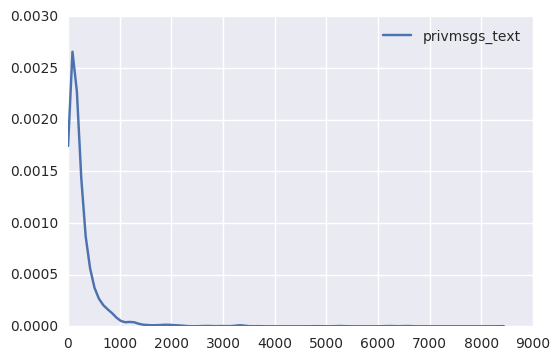

In [18]:
%matplotlib inline
import seaborn as sns

text_lengths = df_pm_content.privmsgs_text.apply(len)

print(text_lengths.describe())
sns.kdeplot(text_lengths, cut=0)

# Geolocation of IPs in the dataset

In [58]:
def assign_geo_info(df, i, geo_info):
    df.loc[i, 'ip_city'] = geo_info["city"]
    df.loc[i, 'ip_country_code'] = geo_info["country_code"]
    df.loc[i, 'ip_country_name'] = geo_info["country_name"]
    df.loc[i, 'ip_latitude'] = geo_info["latitude"]
    df.loc[i, 'ip_longitude'] = geo_info["longitude"]
    df.loc[i, 'ip_region_code'] = geo_info["region_code"]
    df.loc[i, 'ip_region_name'] = geo_info["region_name"]
    df.loc[i, 'ip_time_zone'] = geo_info["time_zone"]
    df.loc[i, 'ip_zip_code'] = geo_info["zip_code"]


In [ ]:
import requests

geo_endpoint = "http://freegeoip.net/json/{ip}"

def geo_lookup(ip):
    r = requests.get(geo_endpoint.format(ip=ip))
    return r.json()

for i, user in df_users.iterrows():
    if i%100 == 0:
        print(i)
    ip = user['user_ip']
    if not ip:
        continue
    
    geo_info = geo_lookup(ip)
    assign_geo_info(df_users, i, geo_info)

In [40]:
df_users.to_csv('datasets/blood-and-honor/users-with-ip.csv', index=False)

In [ ]:
for i, pm in df_pm_all.iterrows():
    ip = pm['author_ip']
    if not ip:
        continue
    
    geo_info = geo_lookup(ip)
    assign_geo_info(pm, geo_info)

In [147]:
df_pm_all['recipient_id'] = df_pm_all.to_address.apply(lambda x: int(x.split('_')[-1]))
for i, row in df_pm_all.iterrows():
    df_pm_all.loc[i, 'conversation_id'] = ":".join(map(str, sorted([row.author_id, row.recipient_id])))
df_pm_all.to_csv('datasets/blood-and-honor/pms-with-ip.csv', index=False)

# Analysis of IP geography of users and posts

In [61]:
df_users = pd.read_csv('datasets/blood-and-honor/users-with-ip.csv', low_memory=False)
df_pm_all = pd.read_csv('datasets/blood-and-honor/pms-with-ip.csv', low_memory=False)

In [65]:
print("Out of {} users, {} have IPs".format(df_users.user_id.count(), df_users.ip_city.count()))

Out of 2666 users, 1881 have IPs


In [78]:
import json
with open('datasets/geo/countries.json') as f:
    countries = json.load(f)

In [80]:
cca2_to_cca3 = {x['cca2']: x['cca3'] for x in countries}

In [97]:
df_users['ip_country_code_cca3'] = df_users.ip_country_code.apply(cca2_to_cca3.get)

counts_by_country = df_users.ip_country_code_cca3.value_counts().reset_index(name='count')
counts_by_country.name = 'counts by country'

In [114]:
for cca3 in cca2_to_cca3.values():
    if not any(counts_by_country['index'] == cca3):
        counts_by_country = counts_by_country.append({'index': cca3, 'count': 0}, ignore_index=True)

counts_by_country.head()

,index,count
0,GBR,551
1,BEL,375
2,DEU,244
3,USA,200
4,CHN,111


In [113]:
import folium

m = folium.Map(location=[54.5, 15.2], zoom_start=3)
m.choropleth(
    geo_path="datasets/geo/countries.geo.json",
    data=counts_by_country,
    columns=['index', 'count'],
    key_on='feature.id',
    fill_color='PuBuGn', fill_opacity=1.0
)

m

/home/sam/text-analytics/venv/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


In [120]:
df_users.user_ip.value_counts()

217.20.122.154     37
195.93.21.105      16
195.93.21.73       16
89.149.227.193     16
70.86.38.2         10
194.146.133.230     9
77.232.15.151       8
78.62.9.58          8
212.54.12.229       7
87.248.169.14       7
218.240.13.108      6
87.118.102.57       6
84.19.180.179       5
86.11.92.6          5
212.54.10.75        5
94.75.221.73        5
66.109.22.204       5
208.88.53.190       5
89.104.115.148      5
94.125.179.5        4
62.43.160.66        4
77.122.138.133      4
87.118.122.152      4
195.2.216.176       3
82.39.20.198        3
82.229.73.36        3
87.236.29.207       3
88.207.85.80        3
67.19.51.90         3
88.68.247.212       3
                   ..
80.201.106.196      1
91.155.156.251      1
82.9.71.125         1
78.151.123.165      1
81.244.120.222      1
87.108.18.6         1
83.92.9.70          1
81.244.25.90        1
84.71.91.43         1
78.21.32.63         1
83.131.3.84         1
217.136.92.180      1
90.151.221.87       1
222.153.148.25      1
84.194.111

In [164]:
df_pms_with_users = pd.merge(df_pm_all, df_users, how='left', left_on='author_id', right_on='user_id')

users_from_separate_ip = df_pms_with_users[df_pms_with_users.author_ip != df_pms_with_users.user_ip]

In [146]:
df_pm_all['conversation_id'].value_counts()

53:952       49
203:367      26
618:1027     24
110:112      22
203:460      20
801:2376     19
72:182       18
1972:2362    15
73:83        15
59:1362      15
65:1972      15
74:103       14
284:801      14
108:277      14
639:1083     13
54:88        12
61:2123      12
171:220      12
59:556       12
171:236      12
66:2161      12
61:2138      12
61:319       12
801:2422     12
143:1053     12
2105:2436    12
110:366      12
108:930      11
215:304      11
98:311       11
             ..
105:2123      1
297:801       1
152:317       1
65:367        1
67:88         1
53:2247       1
148:236       1
211:539       1
70:2296       1
58:181        1
2:124         1
89:279        1
122:168       1
886:1734      1
307:2099      1
72:801        1
239:513       1
54:2373       1
90:189        1
276:351       1
263:1637      1
90:2482       1
1296:1937     1
295:299       1
1:396         1
53:923        1
244:1454      1
53:145        1
58:113        1
122:367       1
Name: conversation_id, d

In [179]:
src_dest_countries_by_conversation = df_pms_with_users[['conversation_id', 'ip_city_x', 'ip_city_y', 'ip_country_name_x', 'ip_country_name_y']].groupby('conversation_id').first().reset_index()

In [182]:
# What cities speak most to each other?

(src_dest_countries_by_conversation.ip_city_x + ',' + src_dest_countries_by_conversation.ip_country_name_x + ':' + src_dest_countries_by_conversation.ip_city_y + ',' + src_dest_countries_by_conversation.ip_country_name_y).value_counts()

Bishop's Cleeve,United Kingdom:Bishop's Cleeve,United Kingdom      17
Wavre,Belgium:Hoves,Belgium                                        11
London,United Kingdom:London,United Kingdom                        10
Bangor,United Kingdom:Bangor,United Kingdom                         8
Antwerp,Belgium:Antwerp,Belgium                                     7
Manchester,United Kingdom:Manchester,United Kingdom                 7
Chorley,United Kingdom:Chorley,United Kingdom                       7
Littleton,United States:Littleton,United States                     6
Tamworth,United Kingdom:Tamworth,United Kingdom                     6
Novosibirsk,Russia:Novosibirsk,Russia                               6
Southampton,United Kingdom:Southampton,United Kingdom               6
Helsinki,Finland:Helsinki,Finland                                   6
St. Petersburg,United States:St. Petersburg,United States           5
London,United Kingdom:Bathgate,United Kingdom                       5
Halifax,United Kingd

In [188]:
# Which cities in the US are best represented?

us_pms = df_pms_with_users[df_pms_with_users.ip_country_code_x == 'US']
(us_pms.ip_city_x + ',' +  us_pms.ip_region_name_x).value_counts()

St. Petersburg,Florida       23
Littleton,Colorado           16
Panama City Beach,Florida    12
Pittsburgh,Pennsylvania       7
Ridgefield,New Jersey         7
Taylor,Michigan               5
Toccoa,Georgia                3
Ridgecrest,California         3
Lawton,Michigan               2
Oak Creek,Wisconsin           2
Oceanside,California          2
Victorville,California        2
Lewes,Delaware                2
Chicago,Illinois              1
Columbus,Ohio                 1
Cleveland,Ohio                1
Rockland,Massachusetts        1
Norfolk,Virginia              1
Englewood,Colorado            1
San Diego,California          1
Glen Ridge,New Jersey         1
Evergreen Park,Illinois       1
Cincinnati,Ohio               1
Seattle,Washington            1
Houston,Texas                 1
dtype: int64

In [192]:
#Messages in Colorado
list(df_pms_with_users[df_pms_with_users.ip_region_name_x == 'Colorado'].message_text)

["Hi, i got the money $370 &amp;quot;thanks so much&amp;quot;..\nWe are going to put $100 towards Kemp's fund for when he gets out in July\nAnother $50 for a prisoner in Florida called Larry Harper\n$50 for books for prisoners\nThen the rest will be put aside till we need it...\nThanks..",
 'WOW thats so freakin awesome, thank you so much.. This has really made my day.. Hope all is well with you and yours..\nVicky',
 'Whats happened to the radio 28',
 'Yes all is good, yes your donation went on a vacation to Korea first.. Thanks for the support...\nVicky',
 'Hey you can send it to my paypal address : &lt;!-- e --&gt;&lt;a href=&quot;mailto:morrigan_rising@yahoo.com&quot;&gt;morrigan_rising@yahoo.com&lt;/a&gt;&lt;!-- e --&gt; we have an order member that gets out and it would greatly help us with the fund raising and we have a family who needs help with clothes alongside a pow in Florda... Thanks so much for everything..\nVicky',
 "B&amp;amp;H Scotland have been such a blessing, we've b

In [206]:
email_regex = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"

df_pms_with_users[df_pms_with_users.message_text.str.contains('@').fillna(False)].message_text.str.extract(email_regex).dropna().value_counts()

/home/sam/text-analytics/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


jotaper@msn.com                       6
s.london-bh@hotmail.co.uk             5
vlaamse-leeuw@hotmail.com             4
wiking8818@yahoo.co.uk                4
westlandbh@hotmail.com                4
bijeli_otpor@hotmail.com              4
mompers236049612@aol.com              4
brotherhood28@hotmail.com             3
runeandsword@btinternet.com           3
volksturm18@hotmail.com               3
camstore1428@hotmail.co.uk            3
volksfront@hotmail.com                3
rahowa1488ah@hotmail.co.uk            3
unit28@hotmail.com                    3
marioberden@yahoo.de                  3
tomasz1488@hotmail.com                3
MOMPERS23649612@AOL.COM               3
bloodhonourvic@hotmail.com            3
chubley828@yahoo.com                  3
uklionbnp@hotmail.com                 2
skinboy1994@hotmail.com               2
xrosierocksmysocksx@hotmail.com       2
stokeybacon_88@hotmail.com            2
diffuzed@live.fr                      2
nmmd@hotmail.co.uk                    2
